# MLP neural networks 

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to refer to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation); see § Terminology. Multilayer perceptrons are sometimes referred to as "vanilla" neural networks, especially when they have a single hidden layer.

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [1]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
#read in the dataset 
dataset = pd.read_csv('framingham.csv')

In [4]:
import preprocessing_ml as pp

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


In [5]:
def Multilayer(X_train,  X_test, y_train, y_test, v=0):
    '''Do multi layer perceptron fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    
    from sklearn.neural_network import MLPClassifier
    
    MLP = MLPClassifier(random_state=0)
    
    MLP.fit(X_train, y_train) 
    
    if v == 1:
        print('running multilayer perceptrons')
    
    return MLP
    
    
    

In [6]:
#apply all functions to model 

dataset_t = pp.chose_features(dataset, n_features=14) #try all columns
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

MLP = Multilayer(X_train, X_test, y_train, y_test, v=1)
y_pred = MLP.predict(X_test)




Scaling data....
	 * Using minmax scaling
running multilayer perceptrons


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.842896174863388


Alternating parameters for MLP

In [8]:
#number of features 
features = dataset.columns #try all columns
acc=[]
for i in range (3, 16 ):
    
    dataset_t = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    MLP= Multilayer(X_train, X_test, y_train, y_test)   
    
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    acc.append(accuracy*100)
print(acc)



[83.52788586251621, 83.4850455136541, 82.19895287958116, 81.54450261780106, 81.54450261780106, 82.19895287958116, 80.76923076923077, 85.0132625994695, 17.177097203728362, 84.95339547270306, 79.50819672131148, 83.33333333333334, 83.06010928961749]


Can see that 11 features gives highest accuracy, so this will be used from now onwards, using default parameters 

In [9]:
#comparison between unscaled and scaled data 

dataset_t1 = pp.chose_features(dataset, n_features=11) #try all columns
dataset_t1 = pp.drop_missing(dataset_t1) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t1) # split dataset
MLP = Multilayer(X_train, X_test, y_train, y_test, v=1)
y_pred = MLP.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Unscaled data accuracy is:', accuracy)


dataset_t2 = pp.chose_features(dataset, n_features=11) #try all columns
dataset_t2 = pp.drop_missing(dataset_t2) # drop missing rows
dataset_t2 = pp.scale_data(dataset_t2, 'minmax', v=1 )
X_train, X_test, y_train, y_test = pp.split_data(dataset_t2) # split dataset
MLP = Multilayer(X_train, X_test, y_train, y_test, v=1)
y_pred = MLP.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Scaled data (using MinMax) accuracy is:', accuracy)

#comparison between unscaled and scaled data 

dataset_t3 = pp.chose_features(dataset, n_features=11) #try all columns
dataset_t3 = pp.drop_missing(dataset_t3) # drop missing rows
dataset_t3 = pp.scale_data(dataset_t3, 'standard', v=1 )
X_train, X_test, y_train, y_test = pp.split_data(dataset_t3) # split dataset
MLP = Multilayer(X_train, X_test, y_train, y_test, v=1)
y_pred = MLP.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Scaled data (using standard) accuracy is:', accuracy)


running multilayer perceptrons
Unscaled data accuracy is: 0.17177097203728361
Scaling data....
	 * Using minmax scaling
running multilayer perceptrons
Scaled data (using MinMax) accuracy is: 0.848202396804261
Scaling data....
	 * Using standard scaling
running multilayer perceptrons
Scaled data (using standard) accuracy is: 0.8375499334221038


Interestingly again unscaled data results in greatest accruracy, when using default settings with 11 fearures 

Comparison between unscaled and scaled for differeing feature numbers 

In [10]:
#number of features 
features = dataset.columns #try all columns
acc2=[]
for i in range (3, 16 ):
    
    dataset_s = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_s = pp.drop_missing(dataset_s) # drop missing rows
    dataset_s = pp.scale_data(dataset_s, 'standard', v=1)
    X_train, X_test, y_train, y_test = pp.split_data(dataset_s) # split dataset
    MLP= Multilayer(X_train, X_test, y_train, y_test)   
    
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    acc2.append(accuracy*100)
print(acc2)

Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling data....
	 * Using standard scaling
[83.78728923476005, 84.26527958387517, 82.4607329842932, 82.59162303664922, 82.59162303664922, 82.59162303664922, 84.88063660477454, 84.21750663129973, 83.75499334221038, 84.95339547270306, 82.10382513661202, 83.46994535519126, 83.33333333333334]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Comparison between scaled and unscaled data for MLP with ranging feature numbers')

Text(0.5, 0, 'Feature number')

Text(0, 0.5, 'Accuracy')

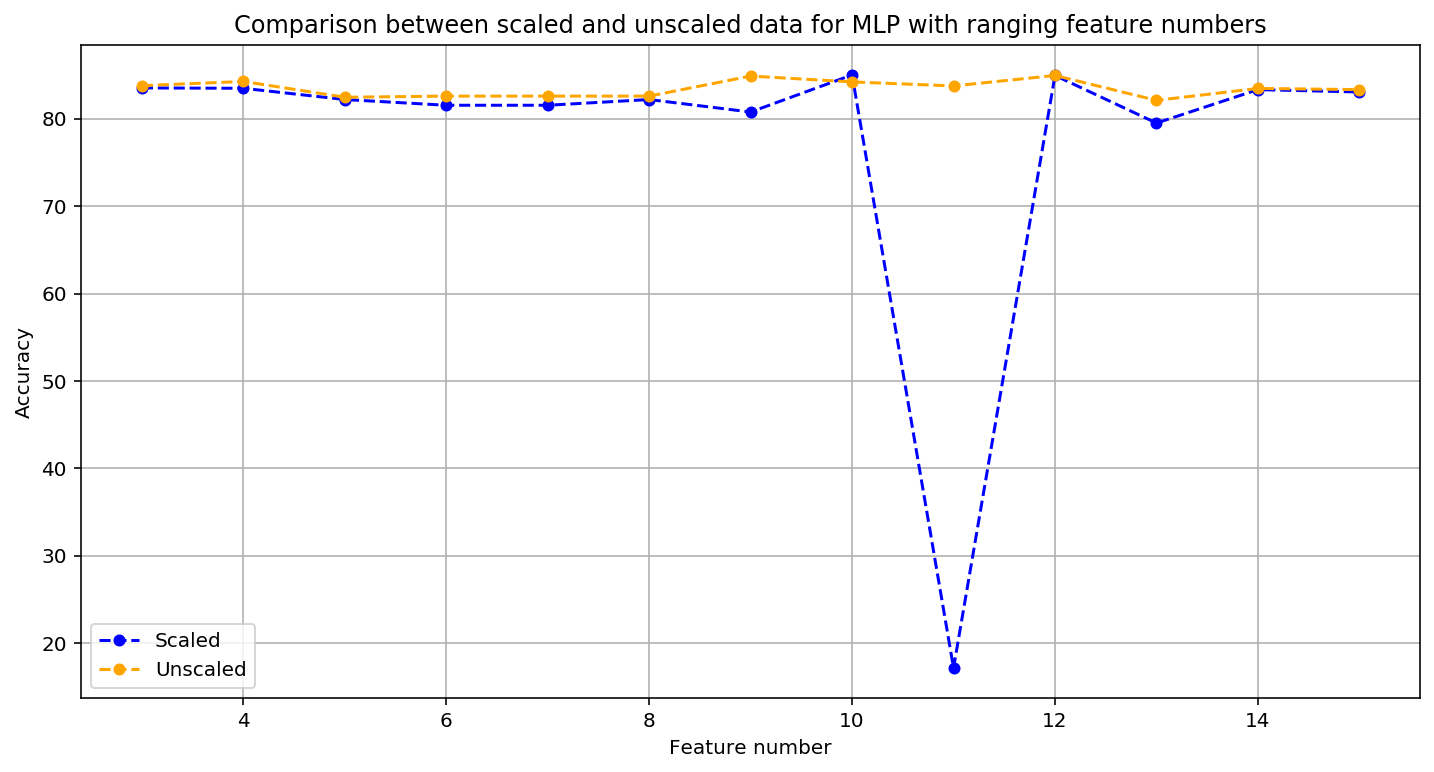

In [11]:
plt.figure(figsize=(12,6))
plt.plot(range(3,16), acc, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5 )
plt.plot(range(3,16), acc2, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=5)
plt.title('Comparison between scaled and unscaled data for MLP with ranging feature numbers')
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['Scaled', 'Unscaled'])

In [12]:
def Multilayer(X_train,  X_test, y_train, y_test, v=0, hidden_layer_sizes=(100,)):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    
    from sklearn.neural_network import MLPClassifier
    
    MLP = MLPClassifier( hidden_layer_sizes, random_state=0)
    
    MLP.fit(X_train, y_train) 
    
    if v == 1:
        print('running multilayer perceptrons')
    
    return MLP
    

In [ ]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

acc4=[]
for i in range(1, 100):
    MLP= Multilayer(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100, i))      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc4.append(accuracy*100)


print(acc4)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), acc4, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

plt.title('Ranging hidden layer numbers and the effect on accuracy ')
plt.grid()
plt.xlabel('Hidden layers ')
plt.ylabel('Accuracy')

In [ ]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

acc5=[]
for i in range(1, 100):
    MLP= Multilayer(X_train, X_test, y_train, y_test, hidden_layer_sizes=(i,))      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc5.append(accuracy*100)


print(acc5)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), acc5, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

plt.title('Ranging hidden layer numbers and the effect on accuracy ')
plt.grid()
plt.xlabel('Hidden layers ')
plt.ylabel('Accuracy')

# Ranging value of alpha - to prevent bias 

In [5]:
def Multilayer(X_train,  X_test, y_train, y_test, v=0, hidden_layer_sizes=(1,), activation ='identity', solver='sgd', alpha =0.05, random_state=0):
    '''Do multilayer perceptron fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    
    from sklearn.neural_network import MLPClassifier
    
    MLP = MLPClassifier(hidden_layer_sizes, activation, solver,  alpha,  random_state)
    
    MLP.fit(X_train, y_train) 
    
    if v == 1:
        print('running multilayer perceptrons')
    
    return MLP
    

In [6]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

alphas = np.logspace(-10, 10, 20)

acc6=[]
for i in alphas:
    MLP= Multilayer(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,), activation='identity', solver='lbfgs', alpha=i)      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc6.append(accuracy*100)


print(acc6)

Scaling data....
	 * Using standard scaling
[85.08655126498003, 85.08655126498003, 85.08655126498003, 85.08655126498003, 85.08655126498003, 85.08655126498003, 85.08655126498003, 85.21970705725698, 85.08655126498003, 85.08655126498003, 85.21970705725698, 85.21970705725698, 84.8202396804261, 84.8202396804261, 84.8202396804261, 84.8202396804261, 84.8202396804261, 84.8202396804261, 84.8202396804261, 84.8202396804261]


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Ranginge value of alpha ')

Text(0.5, 0, 'value of alpha')

Text(0, 0.5, 'Accuracy')

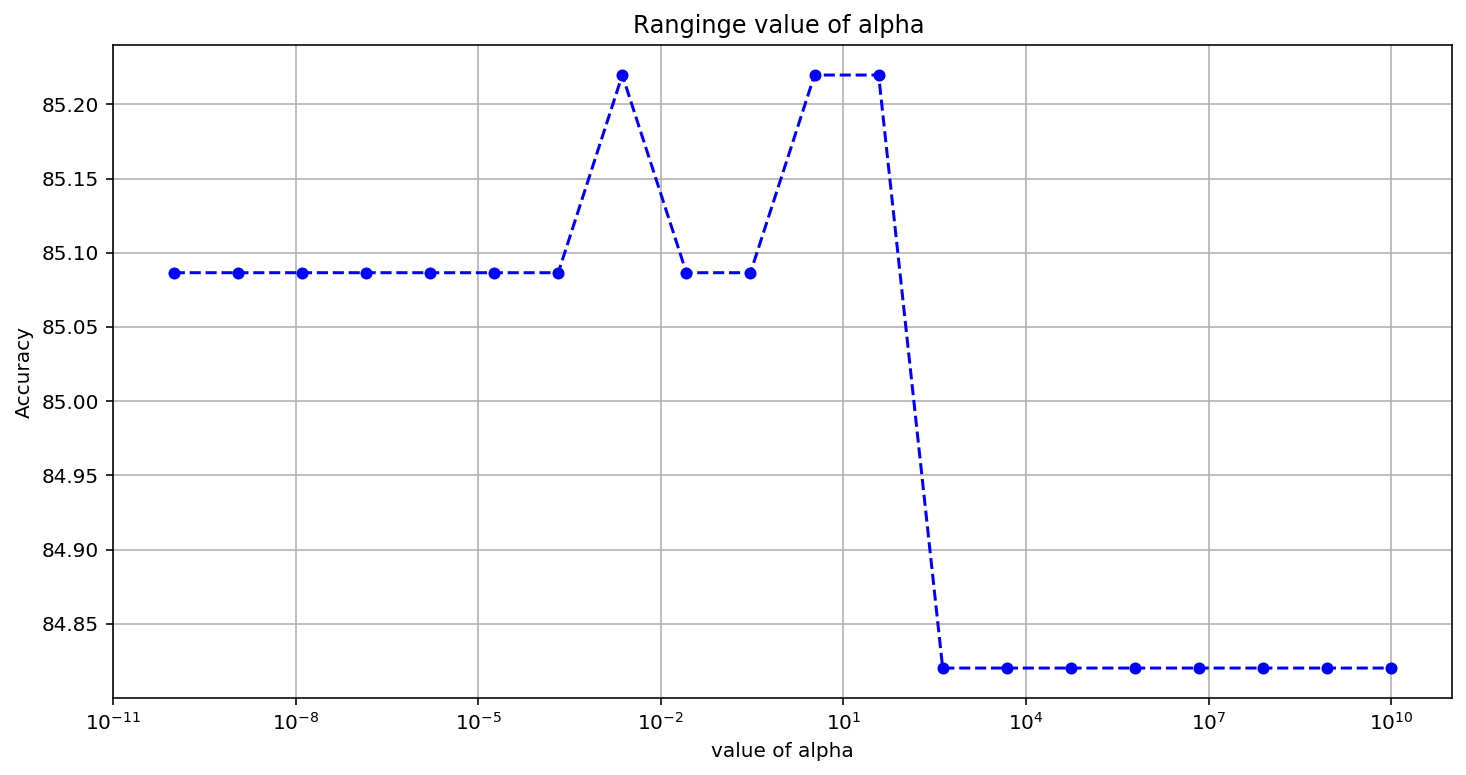

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(alphas, acc6, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Ranginge value of alpha ')
plt.grid()
plt.xlabel('value of alpha')
plt.ylabel('Accuracy')
plt.xscale('log')

In [ ]:
MLP

# Comparison between solvers: ie gradient descent or not

In [8]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

solvers = ['lbfgs', 'sgd', 'adam']

acc7=[]
for i in solvers:
    MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation='identity', solver=i, alpha=0.05 )      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc7.append(accuracy*100)


print(acc7)

Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[85.08655126498003, 84.8202396804261, 84.8202396804261]


Can see that most accurate is for the sgd solver at 85.6%

# Comparison between activations: identity, logistic, tanh or relu

In [ ]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

activations = ['identity', 'logistic', 'tanh', 'relu']

acc8=[]
for i in activations:
    MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation= i, solver='sgd', alpha=0.05)      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc8.append(accuracy*100)


print(acc8)

Identity results in greatest accuracy 

Can be concluded that: alpha = 0.05, scaled data with 12 features and with (100,) hidden layer size results in the most accurate model.


# resampling data using optimised model 

In [6]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.upsample(dataset_t) #upsample data 
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
train, test = pp.split_data(dataset_t, split_dep_var=False) # split dataset
train = pp.upsample(train, v=0)
X_train, y_train = pp.split_dep_var(train);X_test, y_test = pp.split_dep_var(test)



MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(1,), activation= 'identity', solver='sgd', alpha=0.05)      
y_pred = MLP.predict(X_test)
accuracy_upsampled = accuracy_score(y_test, y_pred)

print(accuracy_upsampled*100)

cm=confusion_matrix(y_test,y_pred)
conf_matrix_upsampled=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(y_test,y_pred))




Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


65.88050314465409
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       643
           1       0.65      0.68      0.66       629

    accuracy                           0.66      1272
   macro avg       0.66      0.66      0.66      1272
weighted avg       0.66      0.66      0.66      1272



In [7]:


dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
 
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
train, test = pp.split_data(dataset_t, split_dep_var=False) # split dataset
train = pp.downsample(train, v=0)
X_train, y_train = pp.split_dep_var(train);X_test, y_test = pp.split_dep_var(test)


MLP= Multilayer(X_train, X_test, y_train, y_test, hidden_layer_sizes=(1,), activation= 'identity', solver='sgd', alpha=0.05)      
y_pred = MLP.predict(X_test)
accuracy_downsampled = accuracy_score(y_test, y_pred)

print(accuracy_downsampled*100)

cm=confusion_matrix(y_test,y_pred)
conf_matrix_downsampled=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(y_test,y_pred))



Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


66.97736351531292
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       637
           1       0.25      0.60      0.35       114

    accuracy                           0.67       751
   macro avg       0.58      0.64      0.57       751
weighted avg       0.81      0.67      0.71       751



In [8]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation= 'identity', solver='sgd', alpha=0.05)      
y_pred = MLP.predict(X_test)
accuracy_unsampled = accuracy_score(y_test, y_pred)

print(accuracy_unsampled*100)
cm=confusion_matrix(y_test,y_pred)
conf_matrix_unsampled=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(y_test,y_pred))








Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


84.8202396804261
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       637
           1       0.00      0.00      0.00       114

    accuracy                           0.85       751
   macro avg       0.42      0.50      0.46       751
weighted avg       0.72      0.85      0.78       751



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
#using smote function:

dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.smote(dataset_t) # split dataset

MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation= 'identity', solver='sgd', alpha=0.05)      
y_pred = MLP.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred)

print(accuracy_smote*100)
cm=confusion_matrix(y_test,y_pred)
conf_matrix_smote=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(y_test,y_pred))




Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


65.60000000000001
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       635
           1       0.26      0.66      0.37       115

    accuracy                           0.66       750
   macro avg       0.59      0.66      0.57       750
weighted avg       0.81      0.66      0.70       750



<Figure size 1440x864 with 0 Axes>

Text(0.5, 1, 'Upsampled data ')

Text(0.5, 1, 'Downsampled data ')

Text(0.5, 1, 'Unsampled data ')

Text(0.5, 1, 'Data sampled using smote function ')

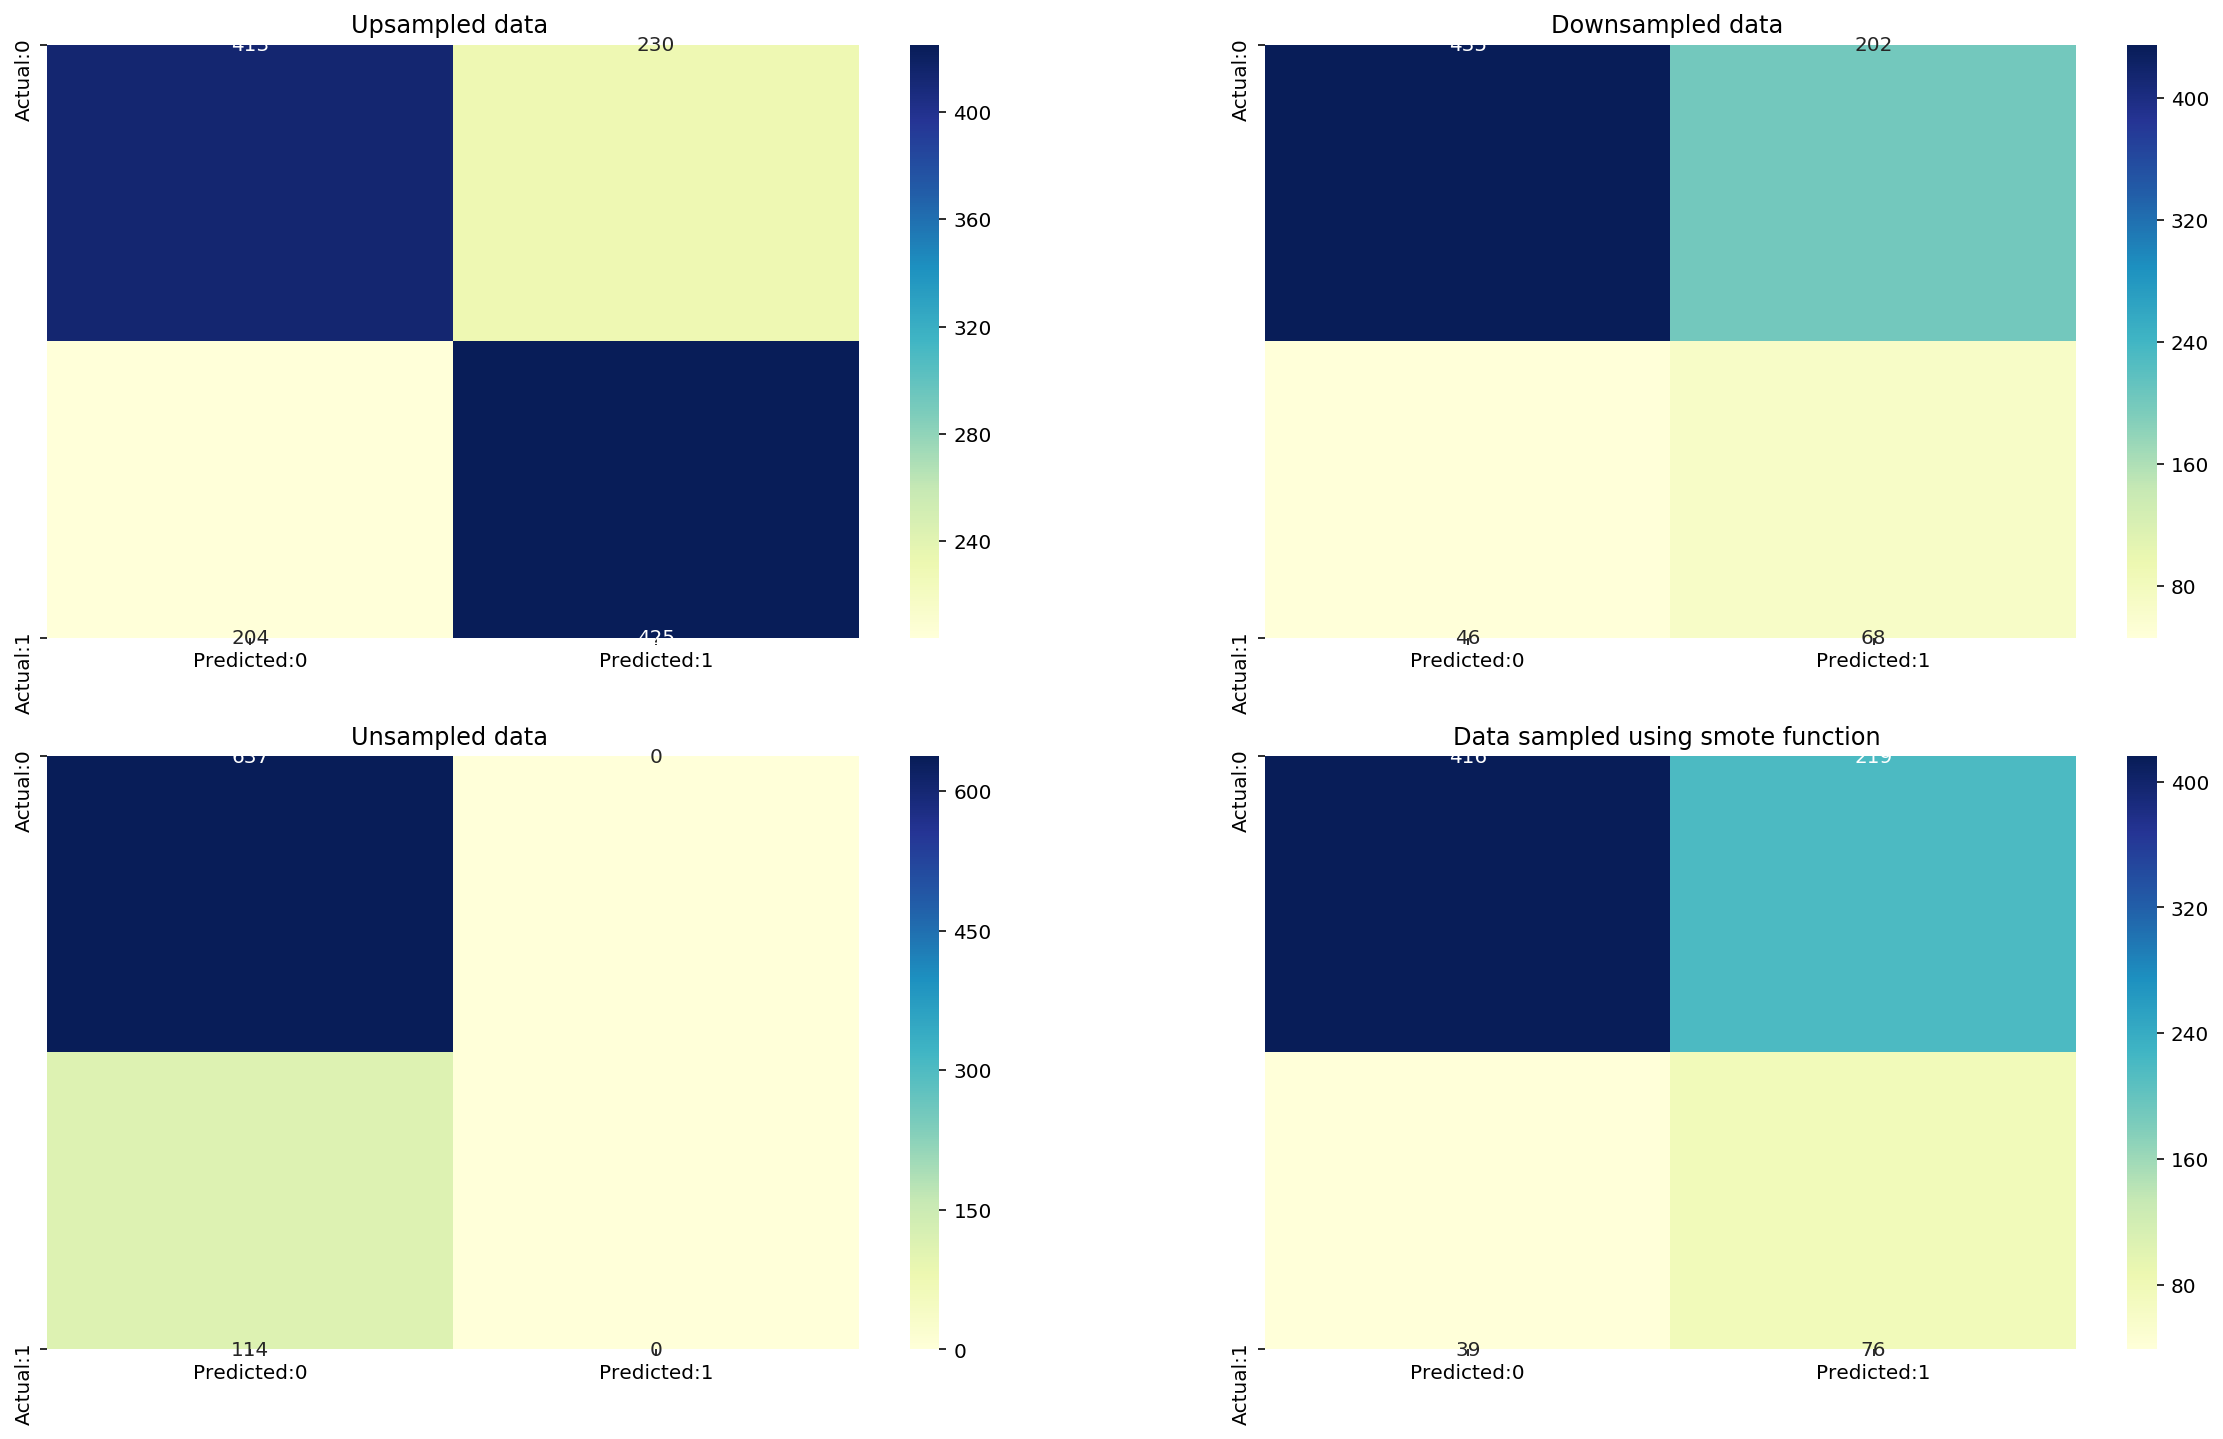

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sn.heatmap(conf_matrix_upsampled, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Upsampled data ')

plt.subplot(2,2,2)
sn.heatmap(conf_matrix_downsampled, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Downsampled data ')

plt.subplot(2,2,3)
sn.heatmap(conf_matrix_unsampled, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Unsampled data ')

plt.subplot(2,2,4)
sn.heatmap(conf_matrix_smote, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Data sampled using smote function ')

# Ranging random states to see effect on accuracy 

In [10]:
def cross_val(model, X, Y, scoring = ['accuracy','precision','recall','f1'], cv=5):
    
   #See https://scikit-learn.org/stable/modules/model_evaluation.html for list of allowed scoring params 
    from sklearn.model_selection import cross_val_score 
    
    print('\nCrossvalidation score for {} splits:\n'.format(cv))   
    
    cv_results = pd.DataFrame(columns=scoring)
    for measure in scoring:
        cv_results[measure] = cross_val_score(model, X, Y, scoring = measure, cv=cv)
    
    #print("Cross validation Accuracy:\n", cv_results.mean(),"\nCross validation STDEV:\n" , cv_results.std())
    return cv_results.mean()

def performance(model,X_test,y_test,cutoff=0.5,v=0,output='Accuracy'):
    from sklearn.preprocessing import binarize
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

    if model == 'fram': # cheap and dirty fix for framingham data needing different processing
        y_pred = X_test > cutoff*100 
    else:
        y_pred = model.predict_proba(X_test)
        y_pred = binarize(y_pred,cutoff)[:,1]
    
    if v == 1: 
        print('\n========\nCuttoff: ',cutoff)
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
        print('f1 score: {:.2f}%'.format(f1_score(y_test,y_pred)*100))
        print('precision score: {:.2f}%'.format(precision_score(y_test,y_pred)*100))
        print('recall score: {:.2f}%'.format(recall_score(y_test,y_pred)*100))
        
        print(classification_report(y_test,y_pred))
    

    if output == 'Accuracy':
         return accuracy_score(y_test,y_pred)
    elif output == 'Precision':
         return precision_score(y_test,y_pred)
    elif output == 'Recall':
         return recall_score(y_test,y_pred)
    elif output == 'f1_score':
         return f1_score(y_test,y_pred)
    elif output == 'All':
        a = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred),
                      recall_score(y_test,y_pred), f1_score(y_test,y_pred)]
        return a



    
# measure = cross_val(k_neighbors(X_train, X_test, y_train, y_test), X_train, y_train,scoring=['accuracy'])

# measure
#where model_name is replaced by whatever you have defined the model fit as 
#For example in the K-neighbors section I have defined the model_name as KN. (see k_neighbors function)

In [189]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split datasetresults = pd.DataFrame(results, columns=['accuarcy', 'precision', 'recall', 'f1'])
states = range(0,20)

results_MLP=[]
for i in states: 
    MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(1,), activation= 'identity', solver='sgd', alpha=0.05, random_state=i)      
    y_pred = MLP.predict(X_test)
    results_MLP.append(performance(MLP, X_test, y_test, output ='All'))
    
                   
results_MLP = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'f1_score'] )



Scaling data....
	 * Using standard scaling


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/c

NameError: name 'results' is not defined

<Figure size 864x432 with 0 Axes>


 MLP summary:


Text(0.5,1,'Ranging values of random state and the effect on model')

Text(0.5,0,'Random state')

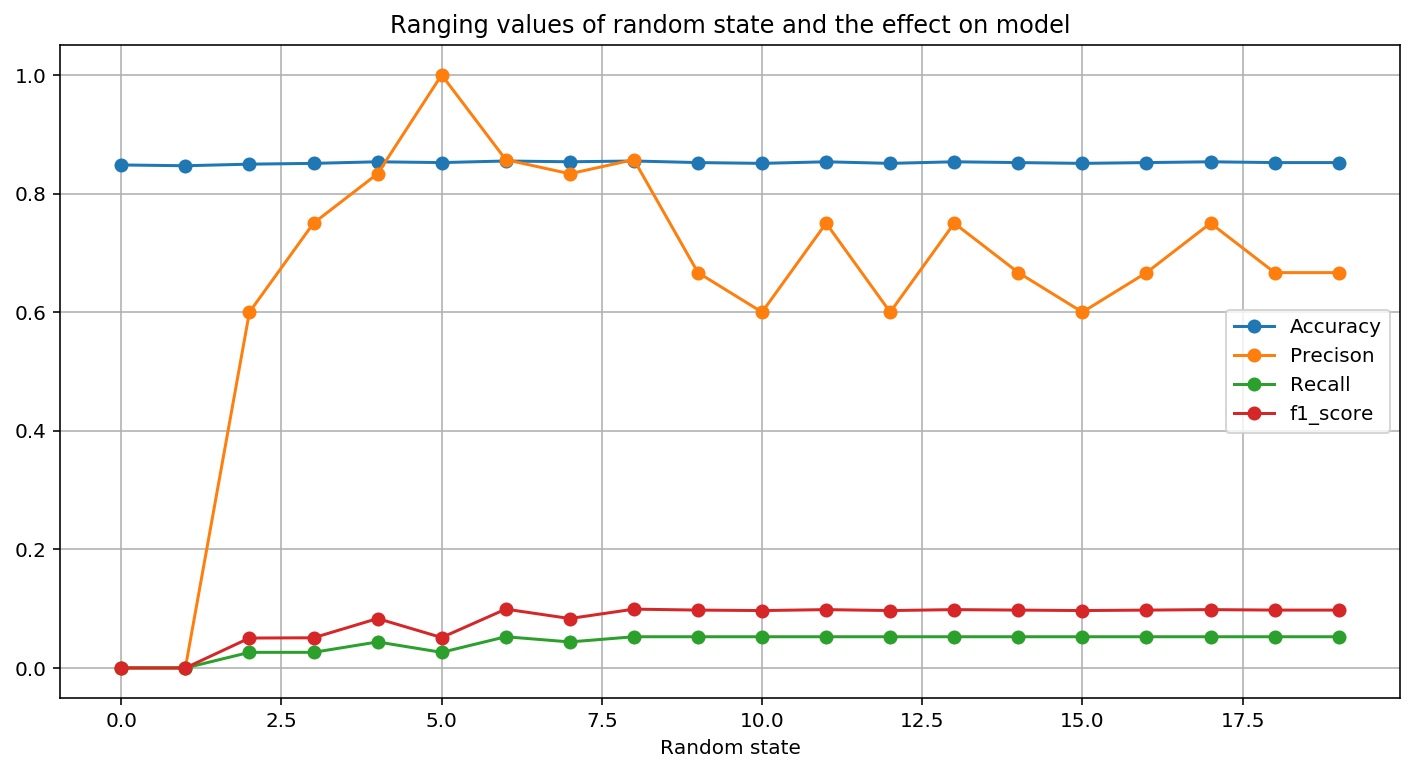

In [130]:
plt.figure(figsize=(12,6))

print('\n MLP summary:')
plt.plot(range(0,20), results_MLP['Accuracy'], label=metric, marker='o')
plt.plot(range(0,20), results_MLP['Precision'], label=metric, marker='o')
plt.plot(range(0,20), results_MLP['Recall'], label=metric, marker='o')
plt.plot(range(0,20), results_MLP['f1_score'], label=metric, marker='o')

plt.grid()
plt.title('Ranging values of random state and the effect on model')
plt.xlabel('Random state')
plt.legend(['Accuracy', 'Precison', 'Recall', 'f1_score'])

In [18]:
#comparison again of features with SMOTE resampling used:
acc8 =[]
for i in range (3, 16 ):
    
    dataset_s = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_s = pp.drop_missing(dataset_s) # drop missing rows
    dataset_s = pp.scale_data(dataset_s, 'standard', v=1)
    X_train, X_test, y_train, y_test = pp.smote(dataset_s, ratio_1_to_0=0.3, v=1) # split dataset
    MLP= Multilayer(X_train, X_test, y_train, y_test)   
    
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc8.append(accuracy*100)
print(acc8)



Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8001038421599169:1

The original ratio of CHD to non-CHD was: 5.484848484848484: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8001041124414368:1

The original ratio of CHD to non-CHD was: 5.4789207419898815: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8001047943411056:1

The original ratio of CHD to non-CHD was: 5.458544839255499: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8001047943411056:1

The original ratio of CHD to non-CHD was: 5.458544839255499: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8001047943411056:1

The original ratio of CHD to non-CHD was: 5.458544839255499: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8001047943411056:1

The original ratio of CHD to non-CHD was: 5.458544839255499: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8000531067445565:1

The original ratio of CHD to non-CHD was: 5.493103448275862: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8000531067445565:1

The original ratio of CHD to non-CHD was: 5.493103448275862: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8001066098081023:1

The original ratio of CHD to non-CHD was: 5.547993019197207: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8001066098081023:1

The original ratio of CHD to non-CHD was: 5.547993019197207: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.7999453402569008:1

The original ratio of CHD to non-CHD was: 5.557347670250896: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.7998906506287589:1

The original ratio of CHD to non-CHD was: 5.567324955116697: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Scaling data....
	 * Using standard scaling

Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.7998906506287589:1

The original ratio of CHD to non-CHD was: 5.567324955116697: 1
The new ratio of CHD to non-CHD is: 1.0: 1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[84.29530201342283, 85.28645833333334, 84.92791612057667, 85.4521625163827, 85.4521625163827, 85.05897771952819, 83.26693227091634, 84.4621513944223, 84.93333333333334, 84.53333333333333, 84.2896174863388, 86.20218579234972, 86.0655737704918]


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Ranging features with SMOTE resampling ')

Text(0.5, 0, 'Feature numbers ')

Text(0, 0.5, 'Accuracy')

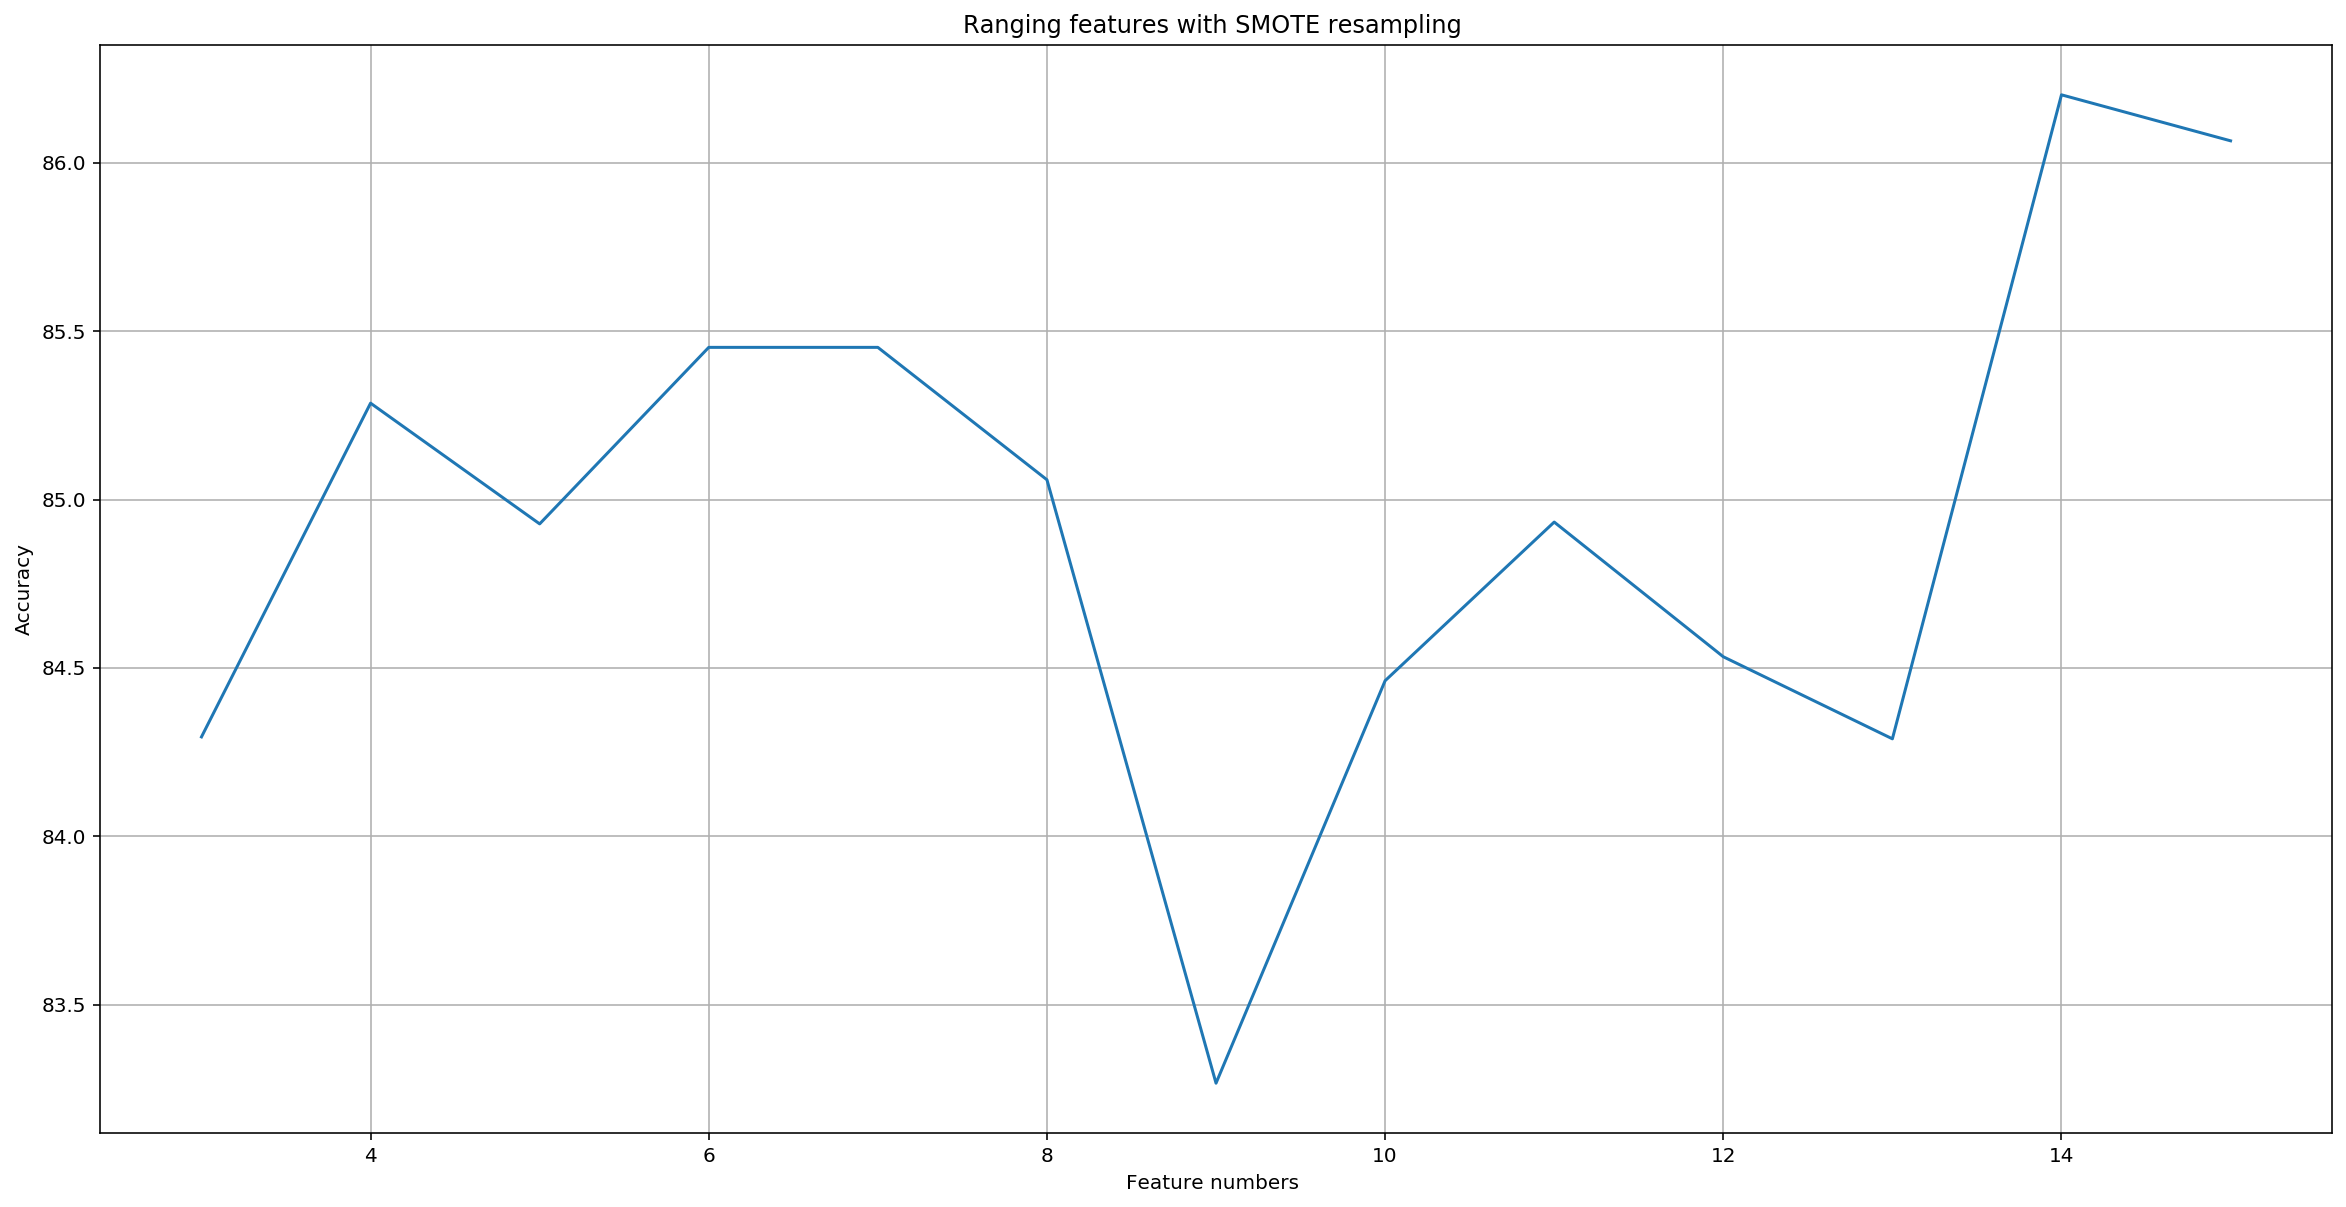

In [19]:
plt.figure(figsize=(20,10))
plt.plot(range(3,16), acc8)
plt.grid()
plt.title('Ranging features with SMOTE resampling ')
plt.xlabel('Feature numbers ')
plt.ylabel('Accuracy')



# Creation of an optimised function - after the evaluation of all the parameters


In [182]:
def multilayer_opt(dataset, v=0):
    
    dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    dataset_t = pp.upsample(dataset_t) #upsample data 
    dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
    train, test = pp.split_data(dataset_t, split_dep_var=False) # split dataset
    train = pp.upsample(train, v=0)
    X_train, y_train = pp.split_dep_var(train);X_test, y_test = pp.split_dep_var(test)
    
    
    from sklearn.neural_network import MLPClassifier
    MLP = MLPClassifier(hidden_layer_sizes=(1,), activation= 'identity', solver='sgd', alpha=0.05, random_state=0)
    MLP.fit(X_train, y_train) 
    y_pred = MLP.predict(X_test)
    
    if v == 1:
        print('running multilayer perceptrons')
        accuracy = accuracy_score(y_test, y_pred)
        print('\nAccuracy is:', accuracy)
        classification = classification_report(y_test, y_pred)
        print(classification)
        
    return MLP
    

Scaling data....
	 * Using standard scaling
running multilayer perceptrons

Accuracy is: 0.6698113207547169
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       643
           1       0.67      0.66      0.67       629

    accuracy                           0.67      1272
   macro avg       0.67      0.67      0.67      1272
weighted avg       0.67      0.67      0.67      1272



MLPClassifier(activation='identity', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Scaling data....
	 * Using standard scaling


roc auc for MLP: 0.7233382865987384


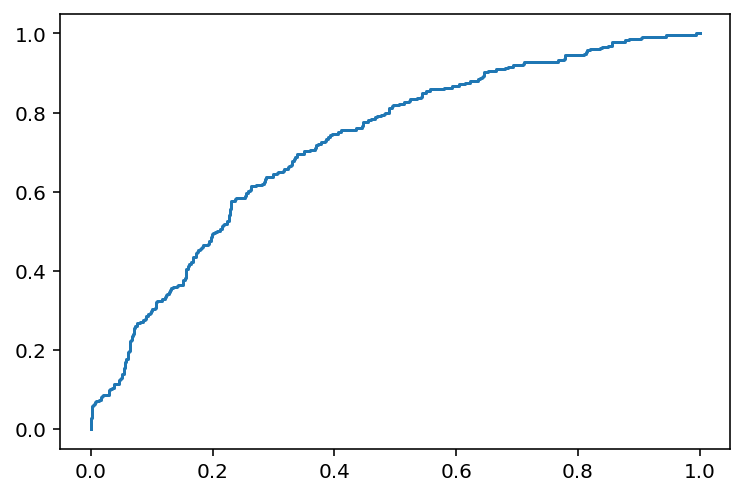

In [184]:
MLP = multilayer_opt(dataset, v=1)
MLP
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.upsample(dataset_t) #upsample data 
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
train, test = pp.split_data(dataset_t, split_dep_var=False) # split dataset
train = pp.upsample(train, v=0)
X_train, y_train = pp.split_dep_var(train);X_test, y_test = pp.split_dep_var(test)

y_pred_prob_yes=MLP.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr,label ='MLP')
print('roc auc for MLP:',roc_auc_score(y_test,y_pred_prob_yes[:,1]))


In [175]:
roc_auc_score

<function sklearn.metrics.ranking.roc_auc_score(y_true, y_score, average='macro', sample_weight=None, max_fpr=None)>